# Analysis Notebook
This notebook is meant to plot in an automated way data from csv file using Pandas and Matplotlib

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from collections import namedtuple
import matplotlib.patches as mpatches

In [4]:
train_df = pd.read_csv("dataset/output/dataset_polimi_extended.csv")

In [7]:
selection = namedtuple("selection", ("conditions", "selected_columns", "group"))

# Plotting

If you have modified something or added some panels click "Cell > Run all below" from this cell

In [132]:
selections = []
i = 0

In [133]:
colors = ['blue','green','red','cyan','magenta','yellow','black']

In [134]:
# COPY ONE OF THIS PANEL TO ADD A LINE
# modify the conditions but be careful: to be compared two lines must have the same x (e.g: "zona")
selections.append(
    selection(
    conditions=( 
                (train_df['zona_italia_Nord'] == 1)) # add your condition with "& <condition>"
    ,selected_columns = ['giorno_della_settimana','vendite'] # select the columns you are interested in
    ,group = ['giorno_della_settimana'] # select the group for which you want the mean
    ))
print("I will be "+colors[i])
i = i+1

I will be blue


In [135]:
# COPY ONE OF THIS PANEL TO ADD A LINE
# modify the conditions but be careful: to be compared two lines must have the same x (e.g: "zona")
selections.append(
    selection(
    conditions=( 
                (train_df['zona_italia_Centro'] == 1)) # add your condition with "& <condition>"
    ,selected_columns = ['giorno_della_settimana','vendite'] # select the columns you are interested in
    ,group = ['giorno_della_settimana'] # select the group for which you want the mean
    ))
print("I will be "+colors[i])
i = i+1

I will be green


In [136]:
# COPY ONE OF THIS PANEL TO ADD A LINE
# modify the conditions but be careful: to be compared two lines must have the same x (e.g: "zona")
selections.append(
    selection(
    conditions=( 
                (train_df['zona_italia_Sud'] == 1)) # add your condition with "& <condition>"
    ,selected_columns = ['giorno_della_settimana','vendite'] # select the columns you are interested in
    ,group = ['giorno_della_settimana'] # select the group for which you want the mean
    ))
print("I will be "+colors[i])
i = i+1

I will be red


In [142]:
selected_dfs = [train_df[sel.conditions][sel.selected_columns].groupby(sel.group).mean()
               for sel in selections]
selected_couples = [(df.index.values, df['vendite']) for (i,df) in enumerate(selected_dfs)]
plot_list = [element for tupl in selected_couples for element in tupl]

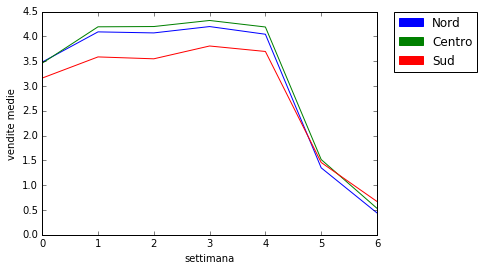

In [143]:
plt.ylabel('vendite medie')
plt.xlabel('settimana')
plt.plot(*plot_list)
blue = mpatches.Patch(color='blue', label='Nord')
green = mpatches.Patch(color='green', label='Centro')
red = mpatches.Patch(color='red', label='Sud')
plt.legend(handles=[blue, green, red], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()